# Error of Training and test set using neural network using Scikit-learn
---

+ Generate a training sample of size 1000 from the model
$$Y = \sigma( a_1^T ) + (a_2^T)^2 + 0.3 \times Z, $$  where $\sigma$ is the sigmoid function, Z is standard normal, $ X=(X_1, X_2) $, each $X_j$ being independent standard normal, and $ a_1=(2,2), a_2=(3,-3)$. Further, generate a test sample of size 1000 from the same model. Note that this exercise is a regression problem.

In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df

def sigmoid (x) :
    return (1 / (1 +np.exp(-x)) )

# train set
np.random.seed(1234)
X1 = np.random.normal(size=1000)
X2 = np.random.normal(size=1000)
Z = np.random.normal(size=1000)
a1 = np.array([2,2])
a2 = np.array([3,-3])
X = np.c_[X1, X2].T
Y = sigmoid(np.dot(a1.T, X)) + np.dot(a2.T, X)**2 + 0.3*Z
train = df({'X1' : X1, 'X2' : X2, 'Y' : Y})

# test set
np.random.seed(5678)
X1 = np.random.normal(size=1000)
X2 = np.random.normal(size=1000)
Z = np.random.normal(size=1000)
a1 = np.array([2,2])
a2 = np.array([3,-3])
X = np.c_[X1, X2].T
Y = sigmoid(np.dot(a1.T, X)) + np.dot(a2.T, X)**2 + 0.3*Z
test = df({'X1' : X1, 'X2' : X2, 'Y' : Y})

In [12]:
train.head()

,X1,X2,Y
0,0.471435,-1.582208,37.698772
1,-1.190976,-1.620190,2.146754
2,1.432707,0.046562,18.230445
3,-0.312652,-1.679829,16.951205
4,-0.720589,1.395892,41.652413


In [13]:
test.head()

,X1,X2,Y
0,-0.709789,2.446675,90.671453
1,-0.017191,-0.263718,0.468323
2,0.319411,-0.331907,4.254673
3,-2.265331,1.996531,163.385024
4,-1.377454,1.847645,94.350355


---
+ Plot the surface of response using function $Y = \sigma( a_1^T ) + (a_2^T)^2 $.

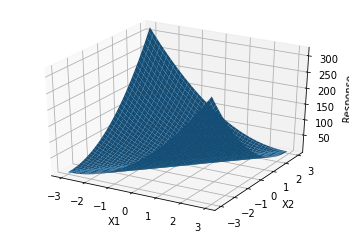

In [14]:
### Plot the surface of response 
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X1 = X2 = np.arange(-3.0, 3.0, 0.05)
a1 = np.array([2,2])
a2 = np.array([3,-3])

xss, yss = np.meshgrid(X1, X2)

def fun(x, y) :
    a1 = np.array([2,2])
    a2 = np.array([3,-3])
    X = np.c_[x, y].T
    return sigmoid(np.dot(a1.T, X)) + np.dot(a2.T, X)**2

zs = np.array([fun(x,y) for x,y in zip(np.ravel(xss), np.ravel(yss))])
Z = zs.reshape(120,120)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xss, yss, Z)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Response')

plt.show()

---
+ Perform a neural network analysis with the number of hidden layer as one. Vary the number of hidden nodes in the hidden layer from 2 up to 10.

In [18]:
### Neural Network analysis usging scikit learn package
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

x_train, x_test, y_train, y_test = train[['X1','X2']], test[['X1','X2']], train['Y'], test['Y']

#estimator = MLPRegressor()
train_error = []
test_error = []

for i in range(1, 11) :
    print('Hidden node : ',i,)
    estimator = MLPRegressor(hidden_layer_sizes=(i,), max_iter=100000)
    estimator.fit(x_train, y_train)
    # train error
    y_predict = estimator.predict(x_train)
    train_error_tmp = sum( (y_predict - y_train)**2/len(y_train))
    print('train error : ', train_error_tmp)
    train_error.append(train_error_tmp)
    # test error    
    y_predict_t = estimator.predict(x_test)
    test_error_tmp = sum( (y_predict_t - y_test)**2/len(y_test))
    print('test error : ', test_error_tmp)
    test_error.append(test_error_tmp)

Hidden node :  1
train error :  568.9227731806169
test error :  742.3362953675586
Hidden node :  2
train error :  365.00802005805406
test error :  452.64120441299673
Hidden node :  3
train error :  8.997707282765512
test error :  14.150474916323093
Hidden node :  4
train error :  9.008159471159148
test error :  14.059247436178564
Hidden node :  5
train error :  8.794822098987376
test error :  13.81038549915451
Hidden node :  6
train error :  1.477955363676087
test error :  3.1667497597619136
Hidden node :  7
train error :  0.7085876610408834
test error :  1.360631145751871
Hidden node :  8
train error :  0.78236193907287
test error :  1.6115960652351111
Hidden node :  9
train error :  0.6872398894821635
test error :  1.3844925594548554
Hidden node :  10
train error :  0.6105671825611634
test error :  1.3005186448511705


---
+ Plot the training and test error curves as a function of the number of hidden nodes. Determine the minimum number of hidden nodes needed to perform well for this task.

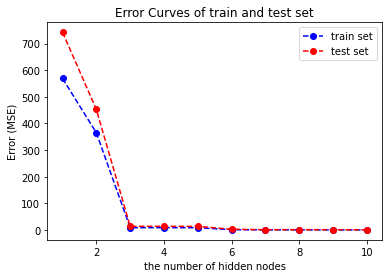

In [19]:
plt.title('Error Curves of train and test set')
n = np.arange(1,11,1)
plt.plot(n, train_error, 'bo--', label='train set')
plt.plot(n, test_error, 'ro--', label='test set')
plt.xlabel('the number of hidden nodes')
plt.ylabel('Error (MSE)')
plt.legend(loc='upper right')
plt.show()

+ So I choose 3-hidden layers becuase 3-hidden layers also guarantee sufficiently low train error and test error and it prevent overfitting.